
                                                    FINAL REPORT

Comparing the various Universities and the distribution of students in Nepal in the year 2018

1. Introduction:
This project attempts to analyze various data sources provided by Open Data Nepal and evaluate the distribution of students in various public and private universities. We will look at the gender distribution, education level and location of the universities and try to compare and contrast whenever possible. 

We will be addressing the following problems or questions in this project:

What are the top Universities in Nepal based on number of students?
How is the gender distribution across universities?
Comparing the number of students in Universites based on the Province they are located in.
Comparing Students and the level of degree they are pursuing.

2. Data Source
Four datasets have been used for this project. 

Dataset 1 : Gender wise Student Distribution across Universities : https://opendatanepal.com/dataset/5fb1e284-d6a0-4d7d-8945-1632e32bf1f6/resource/3529bfab-cca9-4170-bf5c-599eb9e8e545/download university-wise-student-enrollment-of-higher-education-by-sex-in-2074-bs.csv

Dataset 2 : Types of Universites and Student Distribution : https://opendatanepal.com/dataset/cda79f68-e517-4666-9d92-8601418ceb80/resource/5193053a-b6fe-45e7-a6ba-8aae99ced378/download/university-wise-student-enrollment-of-higher-education-by-types-of-campuses-in-2074-bs.csv

Dataset 3 : Province wise Student Distribution across Universities : https://opendatanepal.com/dataset/df7ab4c7-384a-4175-bc19-044fade5c8f2/resource/f4674ab7-5f5f-4a04-ac11-f8cefc68f8c4/download/university-wise-student-enrollment-by-province-in-2074-bs.csv

Dataset 4 : Degree Level wise Student Distribution across Universities : https://opendatanepal.com/dataset/aaba8c3f-b4d3-4f1c-9ef2-32fddbeb0876/resource/115f055f-3d15-4ba8-8bb4-a76b4522acfd/download/university-wise-student-enrollment-of-higher-education-by-levels-in-2074-bs.csv


3. Load data
Creating a pandas dataframe using the local sqlite file.

In [376]:
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings('ignore')


conn1 = sqlite3.connect('..\\data\\gender_data.sqlite')
genderDataFrame = pd.read_sql_query("SELECT * from gender", conn1)


conn2 = sqlite3.connect('..\\data\\university_data.sqlite')
universityDataFrame = pd.read_sql_query("SELECT * from university", conn2)


conn3 = sqlite3.connect("..\\data\\province_data.sqlite")
provinceDataFrame = pd.read_sql_query("SELECT * from province", conn3)


conn4 = sqlite3.connect("..\\data\\degree_data.sqlite")
degreeDataFrame = pd.read_sql_query("SELECT * from degree", conn4)

conn1.close()
conn2.close()
conn3.close()
conn4.close()


5. Distribution of Students Across Universities

Let's Look at distribution of students across all the universities

In [377]:
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Removing the 'Total' row for plotting the bar chart
#Removing any whitespace present in the data
data_frame_trimmed = universityDataFrame.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data_frame_trimmed = data_frame_trimmed.rename(columns={'Total':'Number of Students'})
final_university = data_frame_trimmed.drop(index=15).sort_values('Number of Students',ascending=False)
#Removing Universities with 0 students
final_university = final_university[final_university['Number of Students'] != 0]

fig = px.bar(final_university,x='University',y='Number of Students')
fig.show()

![first_imae](newplot.png)

From the distribution above, we can clearly see that Tribhuvan University is the largest university in terms of number of students enrolled (284,453)

In [378]:
fig = px.pie(final_university, values='Number of Students', names='University', title='Number of students in Various Universities')
fig.show()

![second_image](newplot1.png)

From the pie chart we can see that Tribhuvan University has more than 3 quarters of the total students in the country.

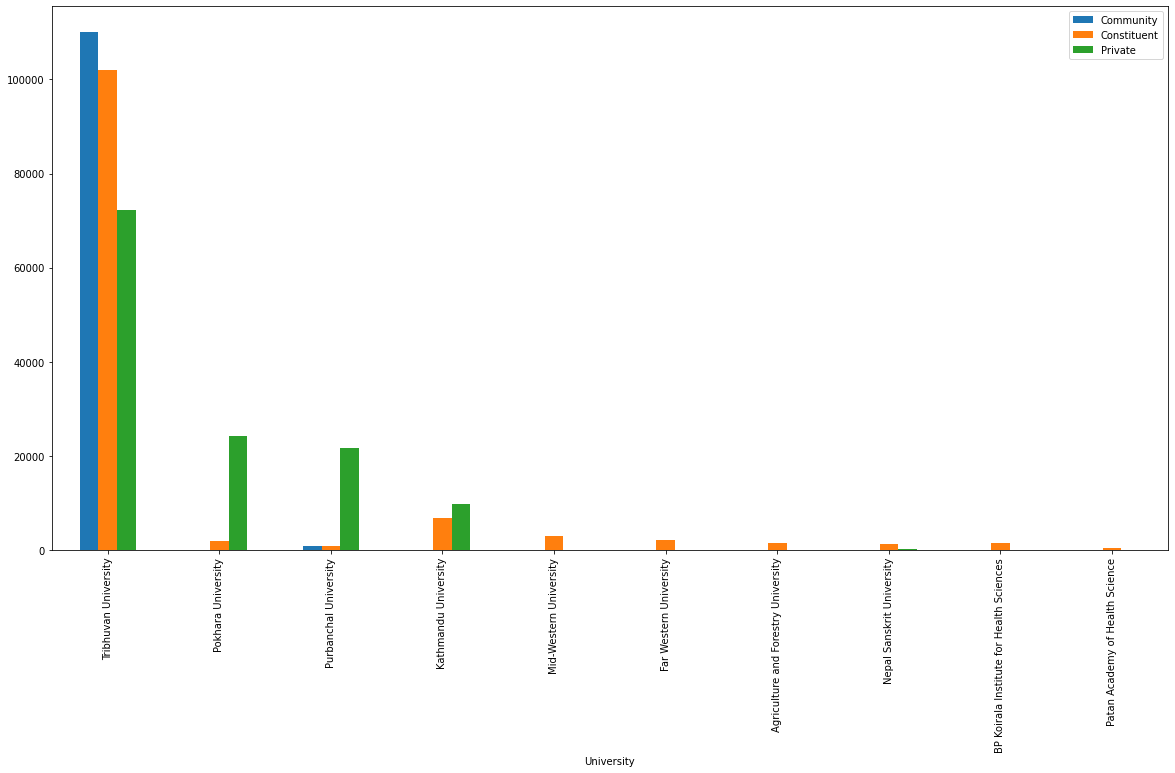

In [379]:

final_university=final_university.sort_values('Number of Students', ascending = False).head(10)

final_university.plot(x='University', y=['Community', 'Constituent', 'Private'],
        kind="bar", figsize=(20, 10))
 
# Display plot
plt.show()

From the bar chart above we can see the distribution of students on different types of campuses across the univerisites. 

6. Distribution of Students based on Gender.

In [380]:
genderDataFrame = genderDataFrame[genderDataFrame['Total'] != 0][genderDataFrame['Total'] != 0]
genderDataFrame_sum = genderDataFrame.drop('Total',axis=1).sum(numeric_only=True)

genderDataFrame_sum_gby = genderDataFrame.groupby(['University']).sum(numeric_only=True)
gender_df = pd.DataFrame(genderDataFrame_sum).columns=['Number of Students']
# plot sum
fig = px.bar(genderDataFrame_sum,title="Distribution of Students by Gender",).update_layout(showlegend=False)
fig.show()

![third_image](newplot2.png)

Although there are a little more male students in the universities, the difference quite small and we can safely say that the genders are evenly matched.

In the table below, we can see how the gender is distributed among top 10 universities

In [381]:
genderDataFrame = genderDataFrame.drop(index=15).sort_values('Total',ascending=False).head(10)
genderDataFrame = genderDataFrame.reset_index(drop=True)
genderDataFrame.style


,University,Male,Female,Total
0,Tribhuvan University,155336,129117,284453
1,Pokhara University,10228,15804,26032
2,Purbanchal University,10657,12882,23539
3,Kathmandu University,8001,8657,16658
4,Mid-Western University,1284,1762,3046
5,Far Western University,1107,1104,2211
6,Agriculture and Forestry University,487,1096,1583
7,Nepal Sanskrit University,250,1221,1471
8,BP Koirala Institute for Health Sciences,704,744,1448
9,Patan Academy of Health Science,165,185,350


Let's Look at the corelation between the number of male and female students across universities

In [382]:
# Calculating 
corr = genderDataFrame['Male'].corr(genderDataFrame['Female'])
print(corr)

0.9982987726464337


So, there is a high correlation (0.99) between male and female distribution across universities.

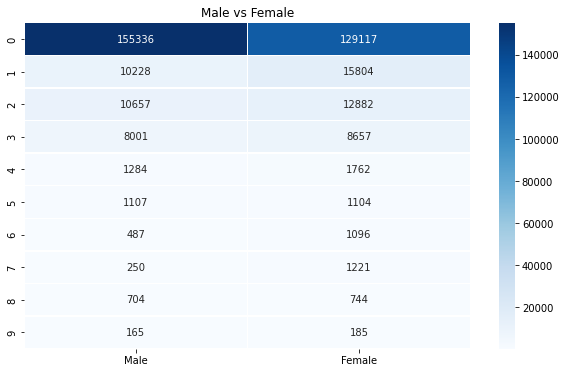

In [383]:
import seaborn as sns
uni= genderDataFrame['University']
gender_data = genderDataFrame[['Male', 'Female']]
plt.figure(figsize=(10, 6))
sns.heatmap(gender_data, annot=True, cmap='Blues', linewidths=.5, fmt = 'g')
plt.title('Male vs Female')
plt.show()

7. Distribution of Students based on the level of degrees they are pursuing 

In [384]:
degreeDataFrame = degreeDataFrame[degreeDataFrame['Total'] != 0][degreeDataFrame['Total'] != 0]
degreeDataFrame_sum = degreeDataFrame.drop('Total',axis=1).sum(numeric_only=True)

degreeDataFrame_sum_gby = degreeDataFrame.groupby(['University']).sum(numeric_only=True)

# plot sum
fig = px.bar(degreeDataFrame_sum,title="Distribution of Students by Degree Level").update_layout(showlegend=False)
fig.show()

![fourth_image](newplot3.png)

Above distribution shows that Most students are enrolled in bachelors degree, foolowed by Masters Studies. Ph. D, M. Phil and PGD have very few students which is understandable as the number devreases with increase in level of studies.

7. Distribution of Students by Province

In [385]:
provinceDataFrame = provinceDataFrame[provinceDataFrame['Total'] != 0][degreeDataFrame['Total'] != 0]
provinceDataFrame_sum = provinceDataFrame.drop('Total',axis=1).sum(numeric_only=True)

provinceDataFrame_sum_gby = provinceDataFrame.groupby(['University']).sum(numeric_only=True)
df = pd.DataFrame(provinceDataFrame_sum)
df.columns= ['Number of Students']

# plot sum
fig = px.bar(df,x=df.index, y='Number of Students',title="Distribution of Students by Provinces").update_layout(showlegend=False)
fig.update_traces(marker_color='green')
fig.show()

![fifth_image](newplot4.png)

In [386]:

df = pd.DataFrame(provinceDataFrame_sum)
df.columns= ['Number of Students']
df.head()
fig = px.pie(df,values='Number of Students', names=df.index, title='Number of students in Various Universities')
fig.show()

![sizth_image](newplot5.png)

Province 3 has the most number of students (more than half of the toal in the country) in higher studies which can be explained by the population of the province and the capital city of the country, Kathmandu being located there.

8. Conclusion

From the analyisis we saw the distribution of students in various universities across Nepal. We found that Tribhuvan University is the largest university of Nepal with more than 3 quarters of the students studying there. Community campuses are the most common campuses among the universities. Regarding the gender distribution, the geders are evenly matched with male studentgs having a slight surplus compared to female students. We also see that male and female distribution is highly correlated. When it comes to the level of studies, the highest numnber of students are enrolled in Bachelors degree, Masters degree is in second postion and other higher degrees having far fewer number of students which is understandable as number natually decreases as levels go higher. Province 3 has more than half of the country's total students as it has the highest popultion and the capital city.